In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, precision_score, recall_score, accuracy_score, classification_report, auc, ConfusionMatrixDisplay

# To remove warnings
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [2]:
df=pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv') 
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [4]:
df.duplicated().sum()

1081

In [5]:
df.shape


(284807, 31)

In [6]:
df=df.drop_duplicates()
df.shape

(283726, 31)

In [7]:
df['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

# ********>>> the data is unbalanced

In [8]:
df['Amount']=df['Amount'].replace([np.inf,-np.inf],np.nan)
df=df.dropna(subset=['Amount'])
df.shape

(283726, 31)

<bound method Axes.set of <Axes: >>

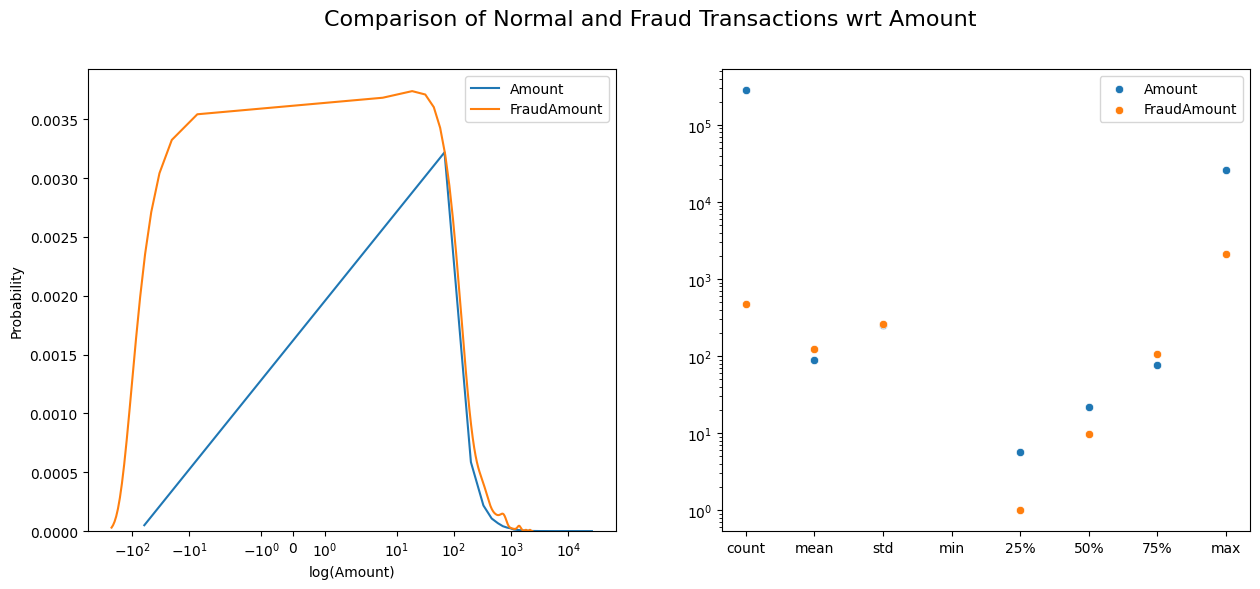

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Comparison of Normal and Fraud Transactions wrt Amount', fontsize=16)

# KDE plot
sns.kdeplot(df[df['Class'] == 0]['Amount'], label='Amount', ax=ax[0])
sns.kdeplot(df[df['Class'] == 1]['Amount'], label='FraudAmount', ax=ax[0])
ax[0].set_xscale('symlog')
ax[0].set_xlabel('log(Amount)')
ax[0].set_ylabel('Probability')
ax[0].legend()  # Ensure the legend is added to the first plot

# Scatter plot of summary statistics
stats_normal = df[df['Class'] == 0]['Amount'].describe()
stats_fraud = df[df['Class'] == 1]['Amount'].describe()

sns.scatterplot(x=stats_normal.index, y=stats_normal.values, label='Amount', ax=ax[1])
sns.scatterplot(x=stats_fraud.index, y=stats_fraud.values, label='FraudAmount', ax=ax[1])

ax[1].set_yscale('log')
ax[1].set

In [10]:
from imblearn.over_sampling import SMOTE
from collections import Counter


# Séparation des caractéristiques (features) et des étiquettes (target)
X = df.drop('Class', axis=1)  
y = df['Class']

# Vérification de la distribution des classes avant SMOTE
print("Avant SMOTE :", Counter(y))

# Application de SMOTE sur l'ensemble du DataFrame
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Création d'un nouveau DataFrame après l'application de SMOTE
df_smote = pd.concat([pd.DataFrame(X_smote, columns=X.columns), pd.DataFrame(y_smote, columns=['Class'])], axis=1)

# Vérification de la distribution des classes après SMOTE
print("Après SMOTE :", Counter(y_smote))


Avant SMOTE : Counter({0: 283253, 1: 473})
Après SMOTE : Counter({0: 283253, 1: 283253})


In [11]:
df=df_smote
df.groupby(['Class']).Amount.mean()

Class
0     88.413575
1    104.994450
Name: Amount, dtype: float64

<bound method Axes.set of <Axes: >>

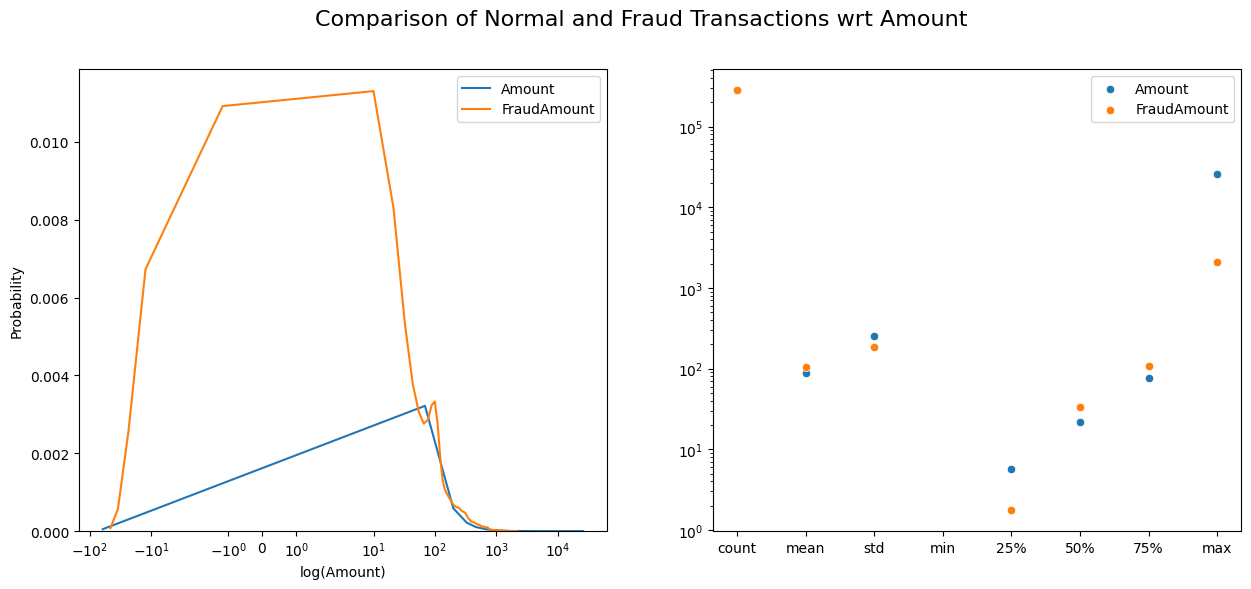

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Comparison of Normal and Fraud Transactions wrt Amount', fontsize=16)

# KDE plot
sns.kdeplot(df[df['Class'] == 0]['Amount'], label='Amount', ax=ax[0])
sns.kdeplot(df[df['Class'] == 1]['Amount'], label='FraudAmount', ax=ax[0])
ax[0].set_xscale('symlog')
ax[0].set_xlabel('log(Amount)')
ax[0].set_ylabel('Probability')
ax[0].legend()  # Ensure the legend is added to the first plot

# Scatter plot of summary statistics
stats_normal = df[df['Class'] == 0]['Amount'].describe()
stats_fraud = df[df['Class'] == 1]['Amount'].describe()

sns.scatterplot(x=stats_normal.index, y=stats_normal.values, label='Amount', ax=ax[1])
sns.scatterplot(x=stats_fraud.index, y=stats_fraud.values, label='FraudAmount', ax=ax[1])

ax[1].set_yscale('log')
ax[1].set

In [13]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94835.058093,0.013439,-0.009829,0.012853,-0.010440,0.006769,0.001251,0.010447,-0.002448,0.002613,...,-0.000489,-0.001150,-0.000160,0.000360,0.000393,-0.000301,0.000065,0.001409,0.000418,88.413575
1,80504.452726,-4.605528,3.556936,-6.919789,4.578053,-3.026321,-1.484459,-5.368849,1.065536,-2.593343,...,0.412362,0.461026,0.084194,-0.081273,-0.109102,0.049626,0.055566,0.213957,0.086005,104.994450


In [14]:
df.duplicated().sum()

0

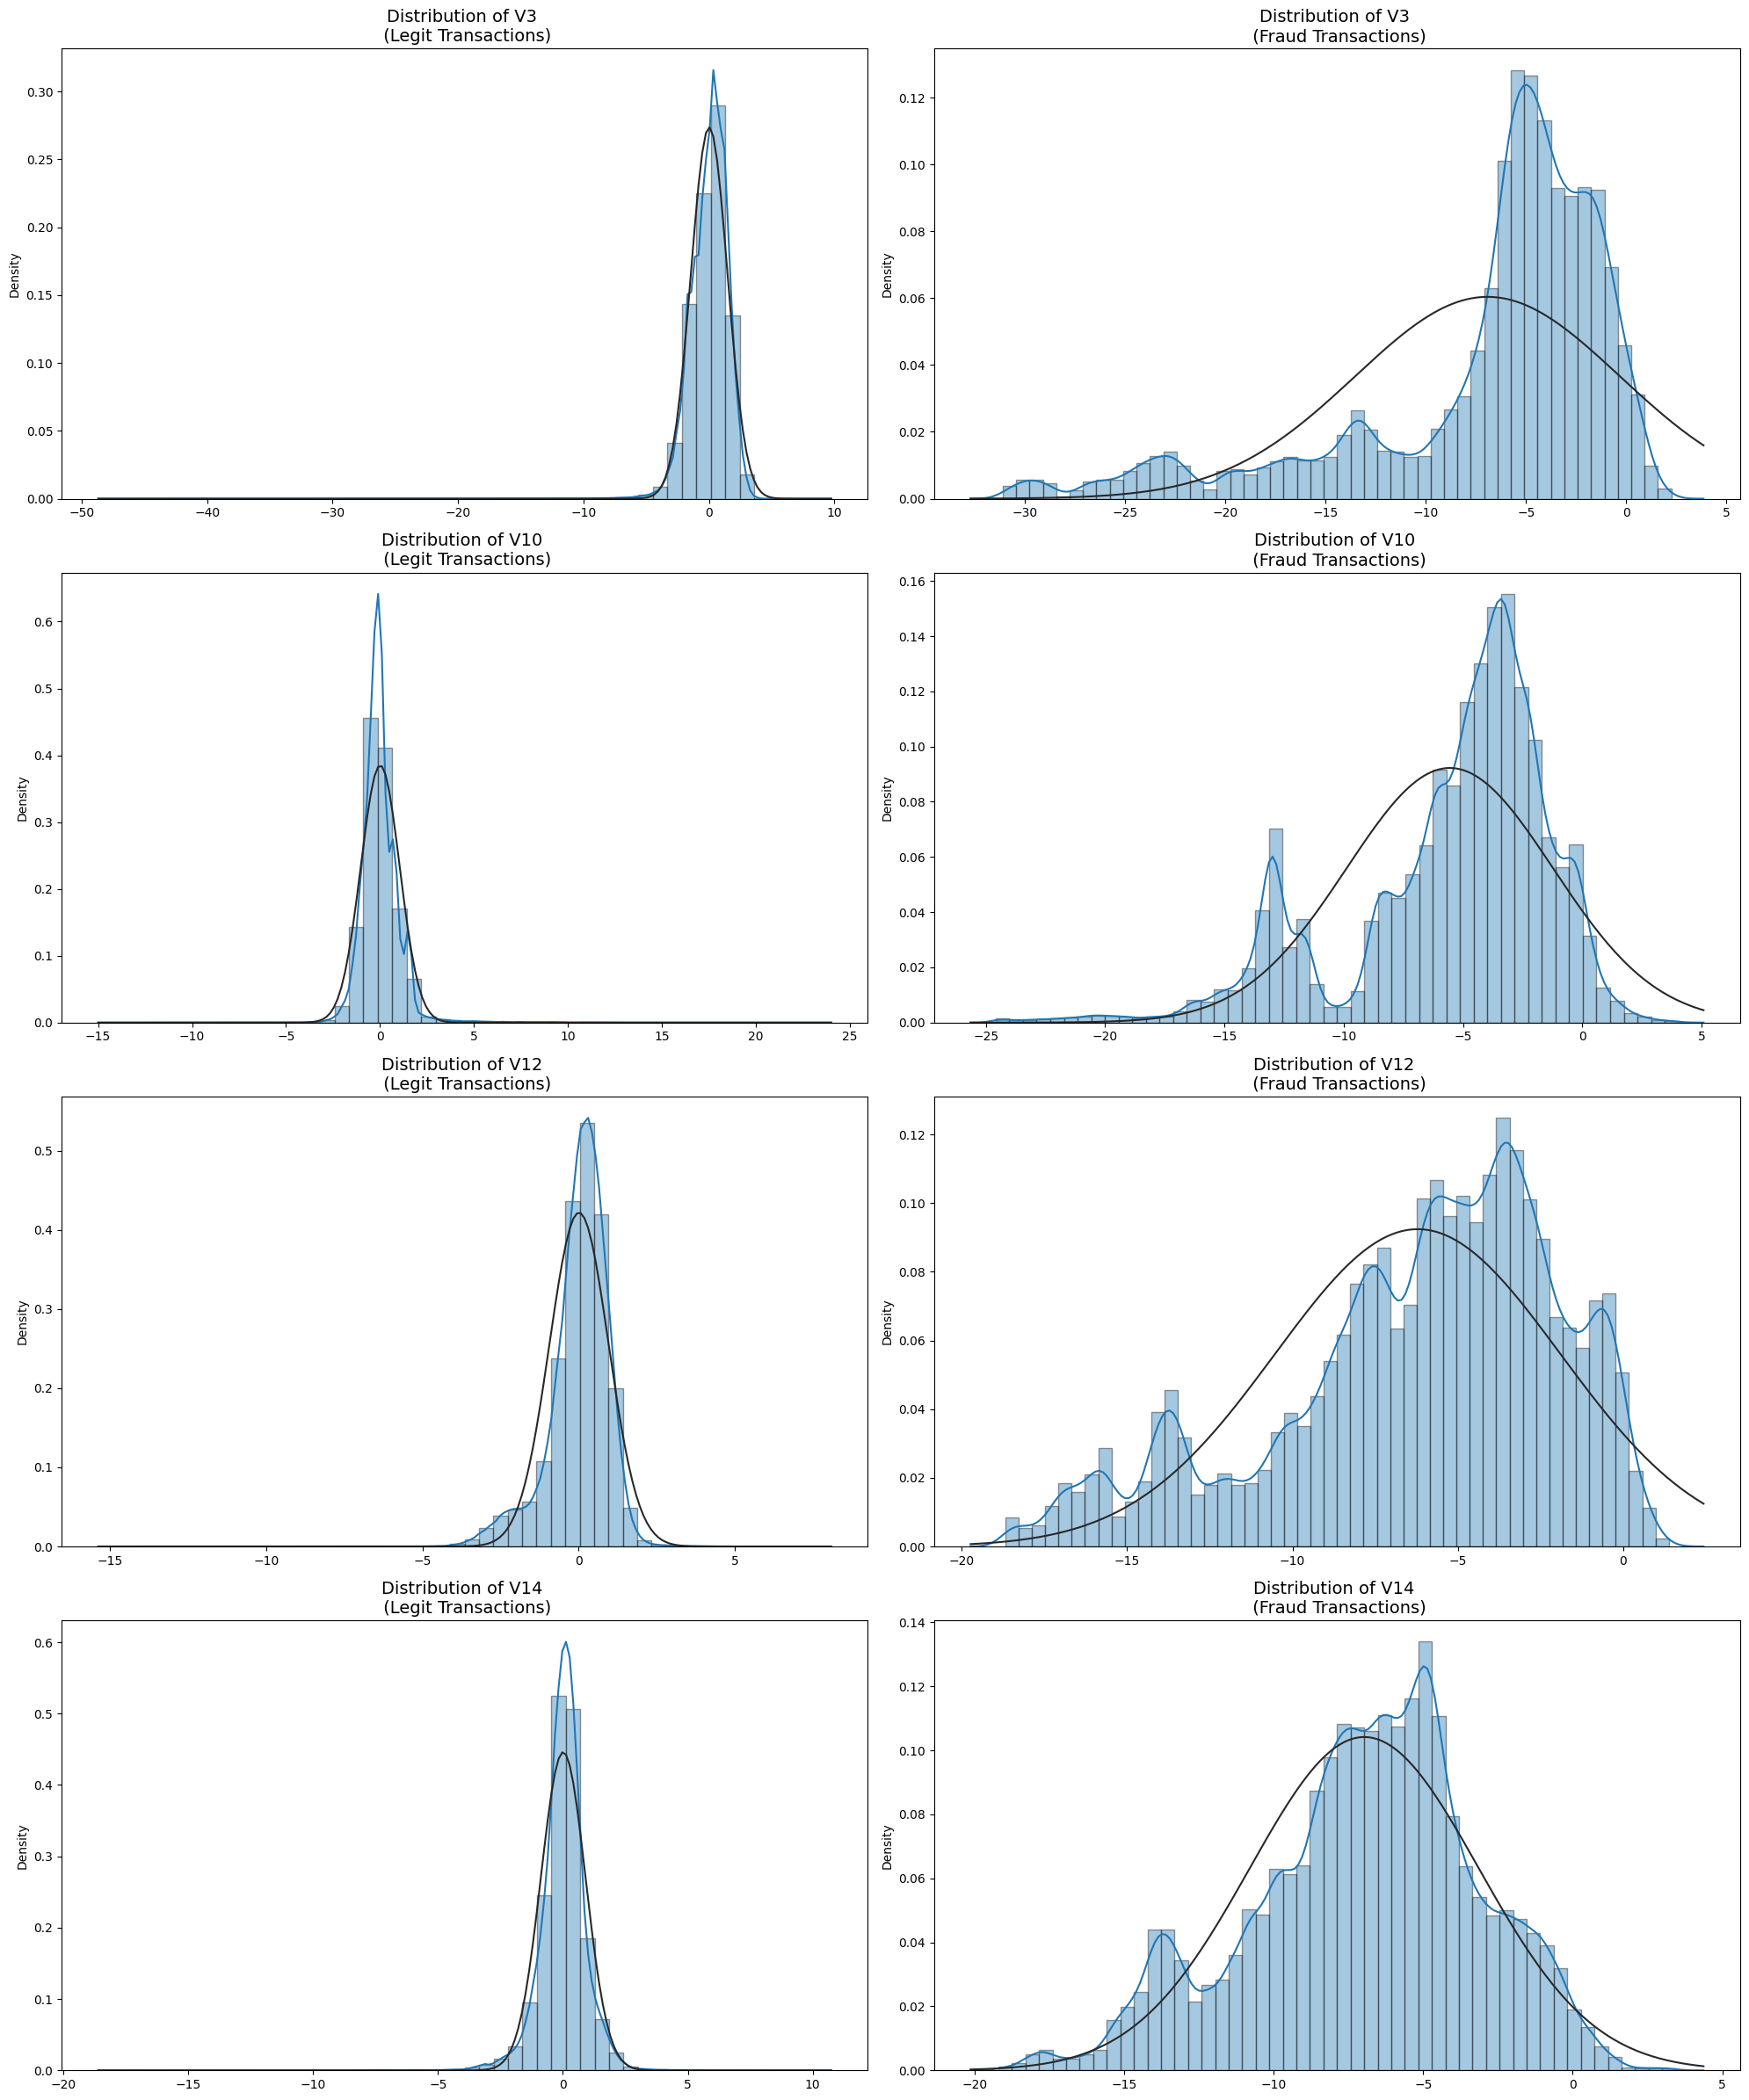

In [15]:
from scipy.stats import norm

# Create subplots
f, ax = plt.subplots(4, 2, figsize=(20, 24))

# Distribution plot for V3
sns.distplot(df['V3'].loc[df['Class'] == 0].values, ax=ax[0][0], fit=norm, hist_kws={'edgecolor':'black'})
ax[0][0].set_title('Distribution of V3 \n (Legit Transactions)', fontsize=14)
sns.distplot(df['V3'].loc[df['Class'] == 1].values, ax=ax[0][1], fit=norm, hist_kws={'edgecolor':'black'})
ax[0][1].set_title('Distribution of V3 \n (Fraud Transactions)', fontsize=14)

# Distribution plot for V10
sns.distplot(df['V10'].loc[df['Class'] == 0].values, ax=ax[1][0], fit=norm, hist_kws={'edgecolor':'black'})
ax[1][0].set_title('Distribution of V10 \n (Legit Transactions)', fontsize=14)
sns.distplot(df['V10'].loc[df['Class'] == 1].values, ax=ax[1][1], fit=norm, hist_kws={'edgecolor':'black'})
ax[1][1].set_title('Distribution of V10 \n (Fraud Transactions)', fontsize=14)

# Distribution plot for V12
sns.distplot(df['V12'].loc[df['Class'] == 0].values, ax=ax[2][0], fit=norm, hist_kws={'edgecolor':'black'})
ax[2][0].set_title('Distribution of V12 \n (Legit Transactions)', fontsize=14)
sns.distplot(df['V12'].loc[df['Class'] == 1].values, ax=ax[2][1], fit=norm, hist_kws={'edgecolor':'black'})
ax[2][1].set_title('Distribution of V12 \n (Fraud Transactions)', fontsize=14)

# Distribution plot for V14
sns.distplot(df['V14'].loc[df['Class'] == 0].values, ax=ax[3][0], fit=norm, hist_kws={'edgecolor':'black'})
ax[3][0].set_title('Distribution of V14 \n (Legit Transactions)', fontsize=14)
sns.distplot(df['V14'].loc[df['Class'] == 1].values, ax=ax[3][1], fit=norm, hist_kws={'edgecolor':'black'})
ax[3][1].set_title('Distribution of V14 \n (Fraud Transactions)', fontsize=14)

# Adjust layout
plt.tight_layout()
plt.show()


# *The values distribution of features of the rows added seems good : no similar or duplicated rows 

In [16]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,566506.000000,566506.000000,566506.000000,566506.000000,566506.000000,566506.000000,566506.000000,566506.000000,566506.000000,566506.000000,...,566506.000000,566506.000000,566506.000000,566506.000000,566506.000000,566506.000000,566506.000000,566506.000000,566506.000000,566506.0
mean,87669.755410,-2.296045,1.773553,-3.453468,2.283806,-1.509776,-0.741604,-2.679201,0.531544,-1.295365,...,0.229938,0.042017,-0.040457,-0.054355,0.024663,0.027816,0.107683,0.043211,96.704012,0.5
std,48540.755057,5.223470,3.438727,5.906449,3.113437,4.005748,1.611989,5.317670,3.862217,2.176962,...,1.774270,0.900912,0.933017,0.539529,0.616785,0.441161,0.838439,0.404361,221.436042,0.5
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.0
25%,45258.006625,-2.875337,-0.108488,-5.021989,-0.060434,-1.702943,-1.536864,-3.052687,-0.187804,-2.260742,...,-0.159732,-0.485709,-0.223356,-0.377657,-0.303272,-0.268745,-0.064579,-0.054769,3.679679,0.0
50%,79318.000000,-0.791381,0.989577,-1.503293,1.456933,-0.421958,-0.688358,-0.723703,0.172683,-0.812899,...,0.155470,0.025993,-0.028903,-0.008377,0.040508,-0.001584,0.060179,0.038099,25.850000,0.5
75%,134934.287152,0.835984,2.768420,0.275172,4.272209,0.441630,0.011477,0.196913,0.844266,0.084986,...,0.618139,0.526254,0.180869,0.335259,0.368565,0.307017,0.427165,0.211207,99.990000,1.0
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.0


# Remove highly correlated features

In [17]:
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]
df.drop(to_drop, axis=1, inplace=True)
to_drop
corr_matrix

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.273492,0.251632,0.180349,0.229636,0.321561,0.144642,0.255955,0.218025,0.186674,...,0.070925,0.151280,0.082201,0.001407,0.227648,0.054210,0.171634,0.008341,0.017652,0.147614
V1,0.273492,1.000000,0.795612,0.881230,0.618947,0.869583,0.413017,0.874994,0.317405,0.653185,...,0.084711,0.055573,0.039344,0.063267,0.147679,0.033127,0.046216,0.132605,0.050025,0.442136
V2,0.251632,0.795612,1.000000,0.864740,0.691662,0.801261,0.405129,0.838121,0.229731,0.703782,...,0.088749,0.067728,0.030879,0.001566,0.148746,0.014995,0.043272,0.014780,0.237595,0.518618
V3,0.180349,0.881230,0.864740,1.000000,0.774488,0.850188,0.530372,0.889691,0.357230,0.753726,...,0.040726,0.050619,0.028407,0.021998,0.139494,0.034897,0.047200,0.080540,0.014449,0.586871
V4,0.229636,0.618947,0.691662,0.774488,1.000000,0.576184,0.479727,0.734745,0.175362,0.794107,...,0.018087,0.140675,0.006486,0.089442,0.012868,0.148159,0.064045,0.048353,0.003073,0.736886
V5,0.321561,0.869583,0.801261,0.850188,0.576184,1.000000,0.366113,0.843770,0.398315,0.646173,...,0.035074,0.051709,0.012494,0.120914,0.154147,0.041958,0.043461,0.118114,0.112626,0.378593
V6,0.144642,0.413017,0.405129,0.530372,0.479727,0.366113,1.000000,0.389933,0.536585,0.406328,...,0.265296,0.197339,0.241014,0.000756,0.177288,0.039440,0.246291,0.088862,0.182058,0.460832
V7,0.255955,0.874994,0.838121,0.889691,0.734745,0.843770,0.389933,1.000000,0.130987,0.784121,...,0.186930,0.215267,0.006117,0.039874,0.003606,0.006605,0.110957,0.131298,0.121085,0.505795
V8,0.218025,0.317405,0.229731,0.357230,0.175362,0.398315,0.536585,0.130987,1.000000,0.133068,...,0.475601,0.419288,0.315769,0.062530,0.345718,0.014147,0.406331,0.071940,0.001383,0.138261
V9,0.186674,0.653185,0.703782,0.753726,0.794107,0.646173,0.406328,0.784121,0.133068,1.000000,...,0.124782,0.227650,0.037926,0.020314,0.007672,0.128862,0.018220,0.105782,0.025328,0.596234


In [18]:
df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    # df = df.dropna('columns')
df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
columnNames = list(df)
columnNames
len(columnNames)

22

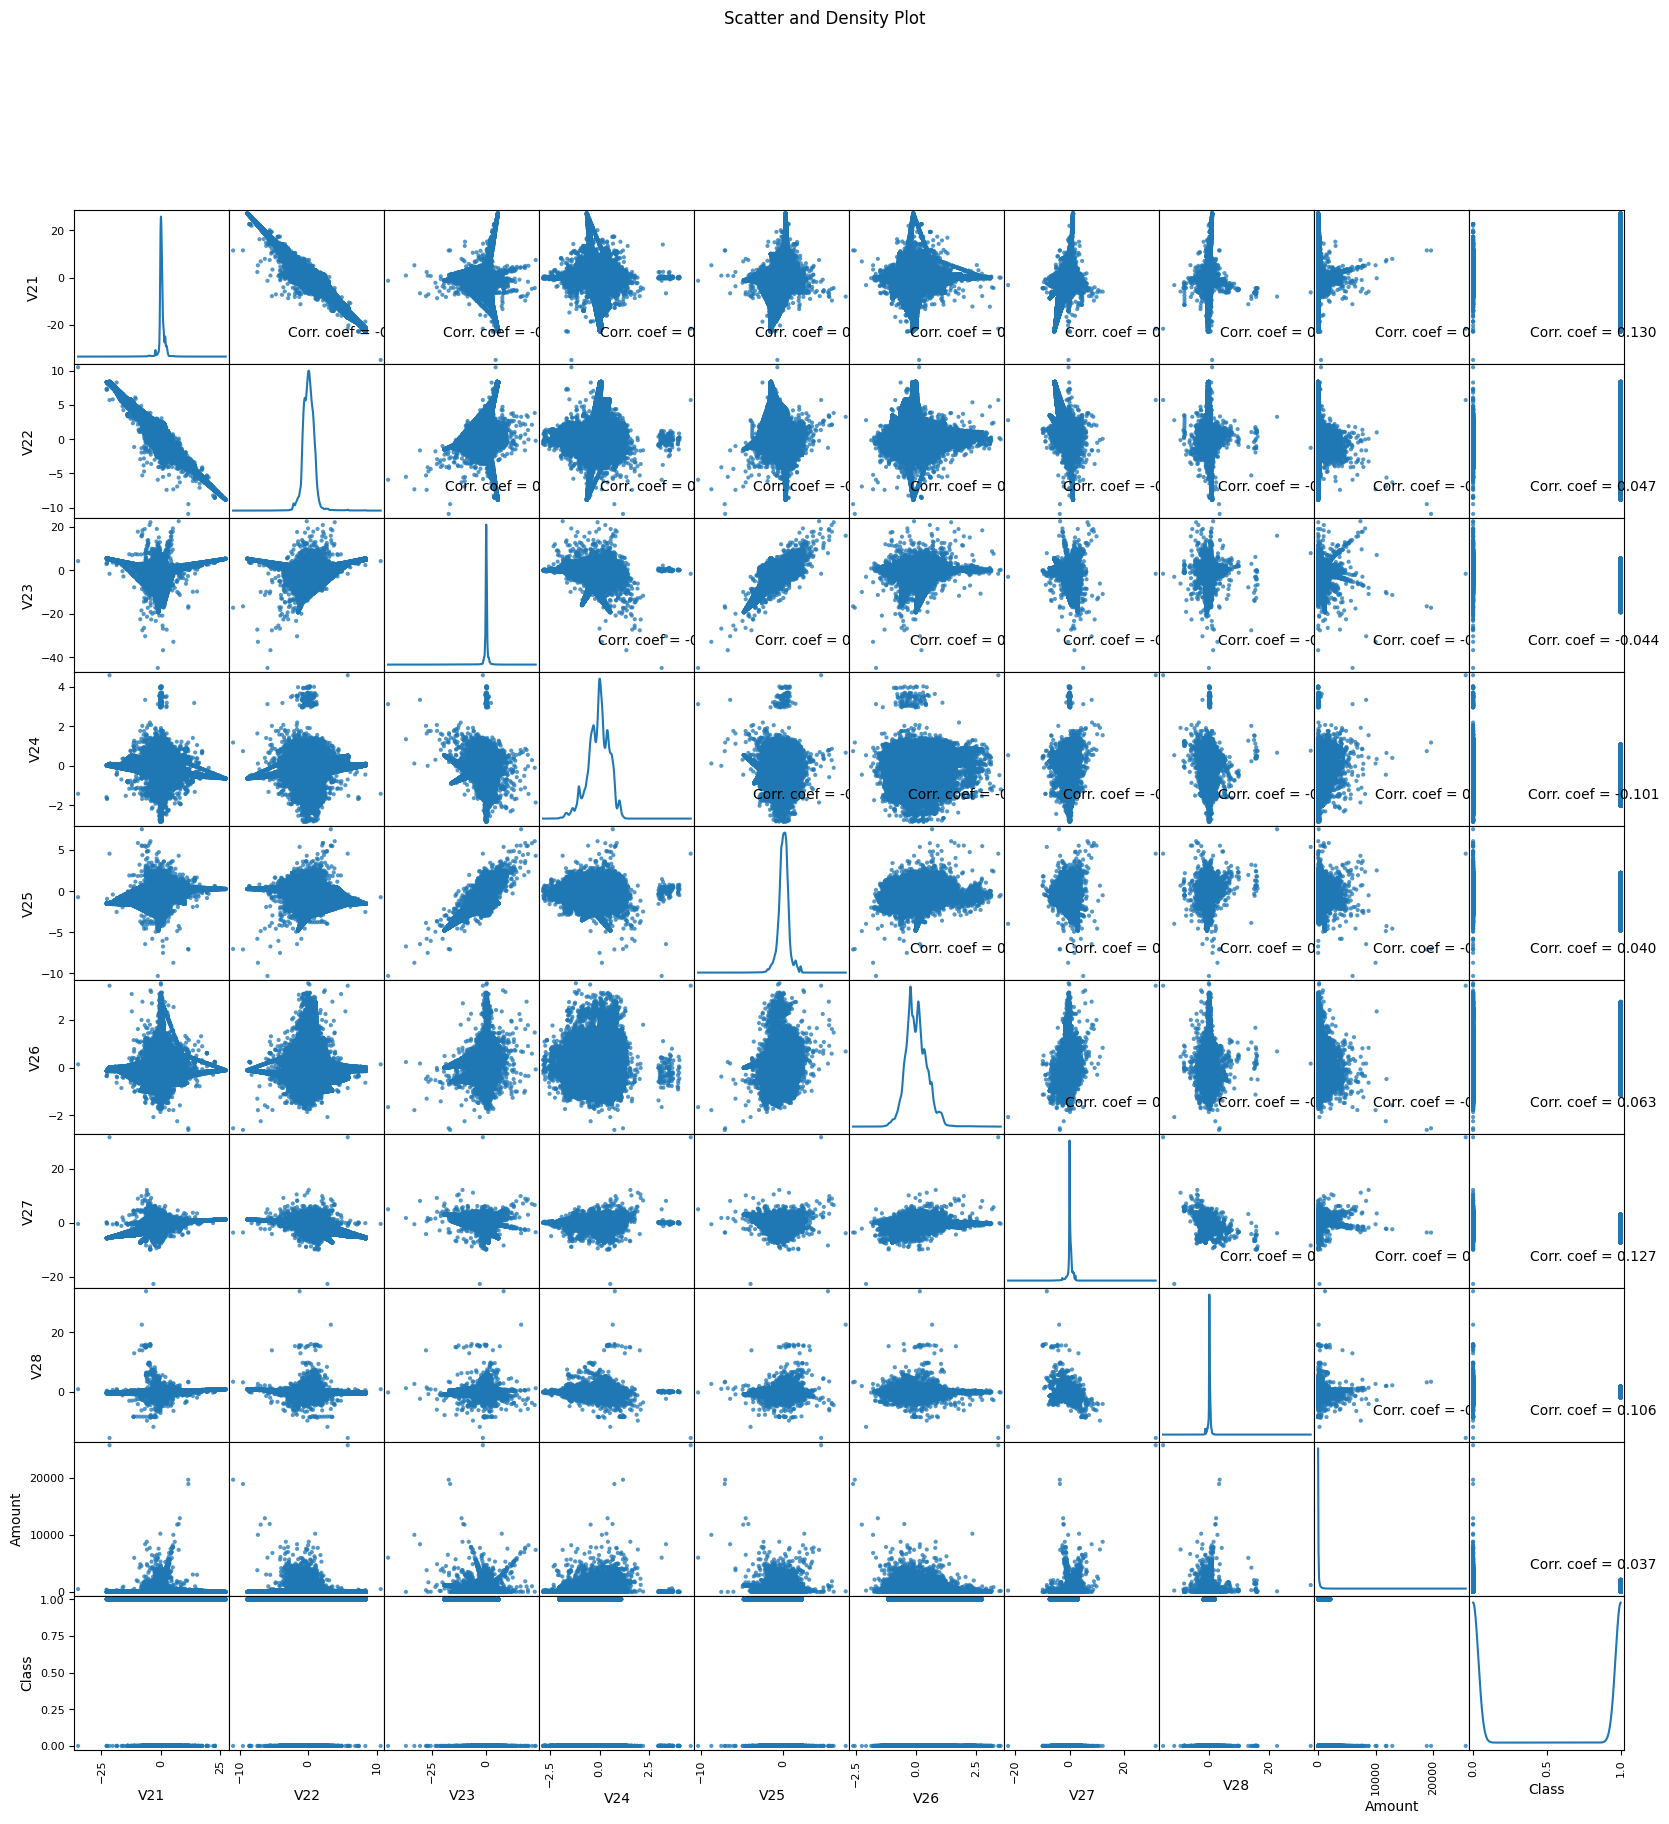

In [19]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    # df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[12:23]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()
    
plotScatterMatrix(df, 20, 10)

# >>>>>Non correlated features 

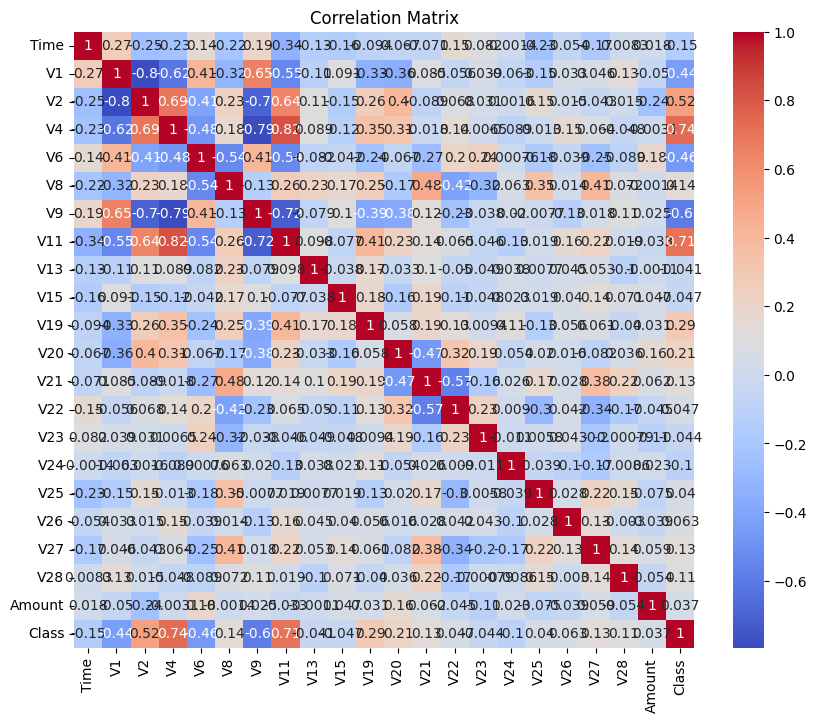

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
corr_matrix = df.corr()

# Plot heatmap for visualization
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [21]:
import pandas as pd

# Supposons que 'df' soit votre DataFrame et 'target' soit le nom de votre variable cible
correlation_matrix = df.corr()

# Obtenez les corrélations avec la variable cible
correlation_with_target = correlation_matrix['Class']

# Filtrer les caractéristiques ayant une corrélation inférieure à 0,05
features_to_keep = correlation_with_target[correlation_with_target.abs() >= 0.05].index.tolist()

# Créer un nouveau DataFrame avec les caractéristiques filtrées
df = df[features_to_keep]

# Afficher le DataFrame filtré
print(df.head())


   Time        V1        V2        V4        V6        V8        V9       V11  \
0   0.0 -1.359807 -0.072781  1.378155  0.462388  0.098698  0.363787 -0.551600   
1   0.0  1.191857  0.266151  0.448154 -0.082361  0.085102 -0.255425  1.612727   
2   1.0 -1.358354 -1.340163  0.379780  1.800499  0.247676 -1.514654  0.624501   
3   1.0 -0.966272 -0.185226 -0.863291  1.247203  0.377436 -1.387024 -0.226487   
4   2.0 -1.158233  0.877737  0.403034  0.095921 -0.270533  0.817739 -0.822843   

        V19       V20       V21       V24       V26       V27       V28  Class  
0  0.403993  0.251412 -0.018307  0.066928 -0.189115  0.133558 -0.021053      0  
1 -0.145783 -0.069083 -0.225775 -0.339846  0.125895 -0.008983  0.014724      0  
2 -2.261857  0.524980  0.247998 -0.689281 -0.139097 -0.055353 -0.059752      0  
3 -1.232622 -0.208038 -0.108300 -1.175575 -0.221929  0.062723  0.061458      0  
4  0.803487  0.408542 -0.009431  0.141267  0.502292  0.219422  0.215153      0  


# Model training and evaluation

In [22]:
X = df.drop(columns='Class', axis=1)
y = df['Class']

# Spliting into Training & Testing Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)

print(X.shape, X_train.shape, X_test.shape)

(566506, 15) (453204, 15) (113302, 15)


In [23]:
# Thain the datasetwith Logistic Regression model
model_lgr = LogisticRegression(max_iter=1000)  # Increase max_iter to 1000
model_lgr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [24]:
X_train_prediction = model_lgr.predict(X_train)
train_data_accuracy = accuracy_score(X_train_prediction, y_train)
print('Accuracy on Training data : ', train_data_accuracy)


# accuracy on test data
X_test_prediction = model_lgr.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy on Training data :  0.9403557779719508
Accuracy score on Test Data :  0.9407953963742918


The model demonstrates strong performance, achieving high accuracy on both the training set (90.63%) and the test set (90.56%). This close alignment between training and test accuracy indicates that the model has effectively captured patterns in the data without overfitting, ensuring good generalization to new, unseen data. Such reliable performance is especially valuable in tasks like fraud detection, where balancing accuracy and model complexity is critical.

In [25]:
# Predict probabilities for the ROC Curve
y_probs = model_lgr.predict_proba(X_test)[:, 1]

# Predict classes for the Confusion Matrix
y_pred = model_lgr.predict(X_test)

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Compute ROC AUC score using continuous predictions (probabilities)
roc_auc = roc_auc_score(y_test, y_probs)

# Compute accuracy, precision, recall using binary class predictions
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('ROC AUC Score:', roc_auc)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)

ROC AUC Score: 0.9804543962085692
Accuracy: 0.9407953963742918
Precision: 0.9518992381331548
Recall: 0.9285096467846993


The model performs exceptionally well, as indicated by the high ROC AUC score of 0.98, suggesting excellent discrimination between fraudulent and non-fraudulent transactions. The accuracy of 94.07% reflects strong overall performance on the test data. A precision of 0.8859 indicates that all transactions identified as fraudulent by the model are indeed fraudulent, meaning no false positives. However, with a recall of 92.85%, the model misses some fraudulent transactions (false negatives), but it still captures the majority. This balance between precision and recall makes the model effective for detecting fraud with minimal false alarms.

In [26]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model_lgr, X, y, cv=5)
print(scores)

[0.78089531 0.92955932 0.94285134 0.93806763 0.94198639]


# >>>THE RESULTS ARE GOOOD 

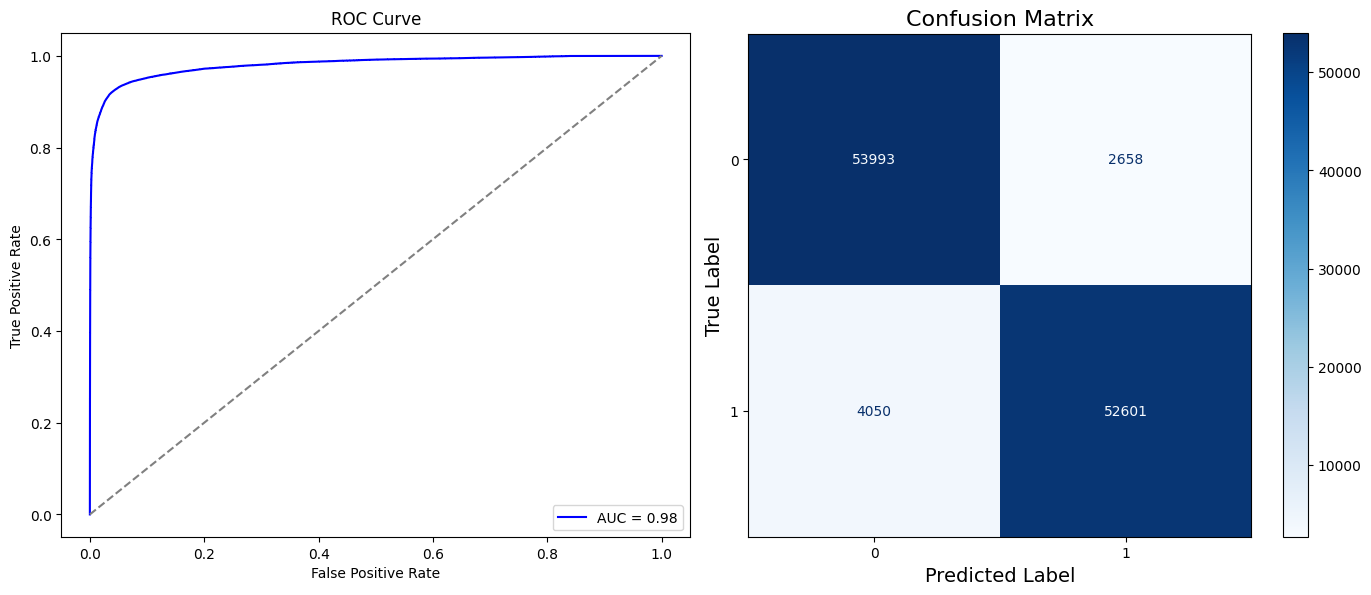

In [27]:
# Predict probabilities for the ROC Curve
y_probs = model_lgr.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Predict classes for the Confusion Matrix
y_pred = model_lgr.predict(X_test)

# Create subplots: 1 row, 2 columns
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot ROC Curve
ax[0].plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
ax[0].plot([0, 1], [0, 1], color='gray', linestyle='--')
ax[0].set_title('ROC Curve')
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')
ax[0].legend(loc='lower right')

# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax[1], cmap='Blues', values_format='d')
# Styling for Confusion Matrix
ax[1].set_title('Confusion Matrix', fontsize=16)
ax[1].set_xlabel('Predicted Label', fontsize=14)
ax[1].set_ylabel('True Label', fontsize=14)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

# **The confusion matrix shows that the model correctly identified 53993 non-fraudulent transactions (True Negatives) and 52601 fraudulent transactions (True Positives). Importantly, there are no false positives, meaning the model didn't incorrectly label any legitimate transactions as fraud. However, it did miss 4050 fraudulent transactions (False Negatives), which indicates a small number of actual fraud cases were not detected. Overall, the model is highly precise, with less false alarms, but there's some room for improvement in recall to capture all fraudulent activities. The model is strong but could be enhanced to reduce missed fraud cases.

# TESTING RandomForestClassifier AND DecisionTreeClassifier

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier




# Define a list of models to test
models = {
   
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    
    
}

# Function to train and evaluate each model
def evaluate_models(models, X_train, X_test, y_train, y_test):
    results = {}
    
    for name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        
        # Store the results
        results[name] = {
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1
        }
        
    return results

# Run the evaluation
results = evaluate_models(models, X_train, X_test, y_train, y_test)

# Display results
for model_name, metrics in results.items():
    print(f"{model_name}:")
    for metric, score in metrics.items():
        print(f"  {metric}: {score:.4f}")



Decision Tree:
  Accuracy: 0.9966
  Precision: 0.9953
  Recall: 0.9980
  F1 Score: 0.9966
Random Forest:
  Accuracy: 0.9997
  Precision: 0.9993
  Recall: 1.0000
  F1 Score: 0.9997


# RandomForestClassifier Performance

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
 
model.fit(X_train, y_train)
X_train_prediction = model.predict(X_train)
train_data_accuracy = accuracy_score(X_train_prediction, y_train)
print('Accuracy on Training data : ', train_data_accuracy)


# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy on Training data :  1.0
Accuracy score on Test Data :  0.9996557871882227


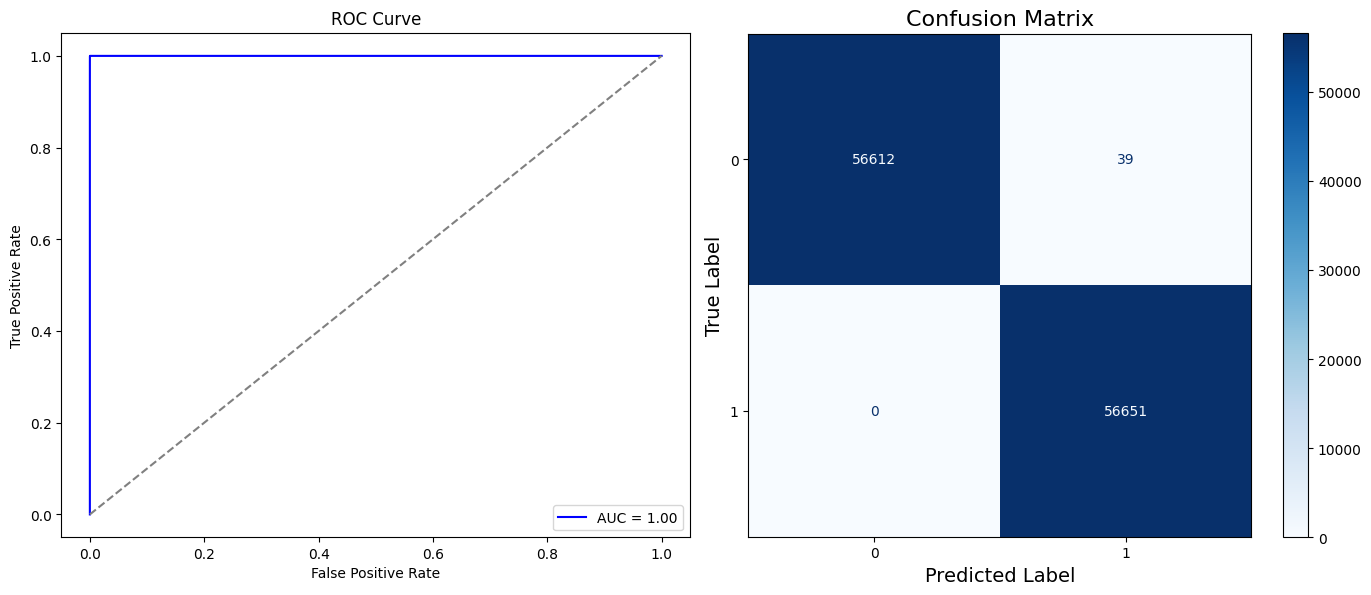

In [30]:


# Predict probabilities for the ROC Curve
y_probs = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Predict classes for the Confusion Matrix
y_pred = model.predict(X_test)

# Create subplots: 1 row, 2 columns
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot ROC Curve
ax[0].plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
ax[0].plot([0, 1], [0, 1], color='gray', linestyle='--')
ax[0].set_title('ROC Curve')
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')
ax[0].legend(loc='lower right')

# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax[1], cmap='Blues', values_format='d')
# Styling for Confusion Matrix
ax[1].set_title('Confusion Matrix', fontsize=16)
ax[1].set_xlabel('Predicted Label', fontsize=14)
ax[1].set_ylabel('True Label', fontsize=14)

# Adjust layout and show plot
plt.tight_layout()
plt.show()


In [31]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5)
print(scores)

[0.63313092 0.99880848 0.99835836 0.99964696 0.571769  ]


*******Verifying the RANDOMFOREST CLASSIFIER with cross validation Shows that the results is significantly different : 0.57<<<<< 0.999 

# >>>>> Overfitting Risk

# DecisionTreeClassifier Performance

In [32]:
model=DecisionTreeClassifier()
 
model.fit(X_train, y_train)
X_train_prediction = model.predict(X_train)
train_data_accuracy = accuracy_score(X_train_prediction, y_train)
print('Accuracy on Training data : ', train_data_accuracy)


# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy on Training data :  1.0
Accuracy score on Test Data :  0.9966549575470866


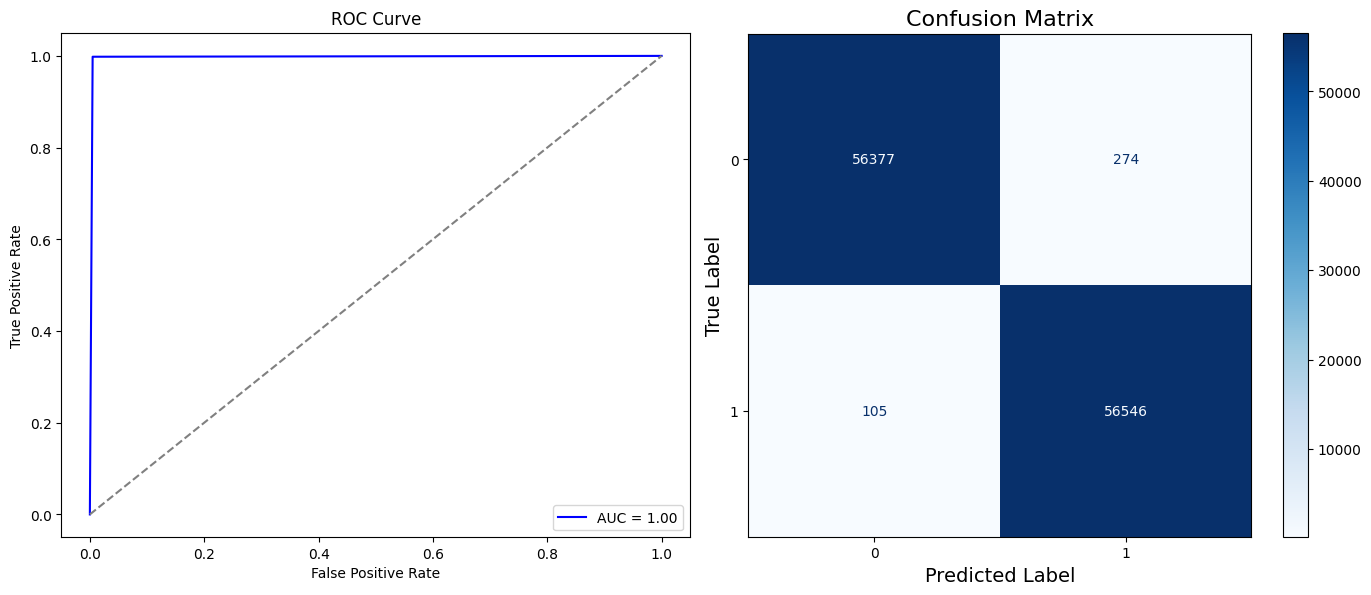

In [33]:
# Predict probabilities for the ROC Curve
y_probs = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Predict classes for the Confusion Matrix
y_pred = model.predict(X_test)

# Create subplots: 1 row, 2 columns
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot ROC Curve
ax[0].plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
ax[0].plot([0, 1], [0, 1], color='gray', linestyle='--')
ax[0].set_title('ROC Curve')
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')
ax[0].legend(loc='lower right')

# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax[1], cmap='Blues', values_format='d')
# Styling for Confusion Matrix
ax[1].set_title('Confusion Matrix', fontsize=16)
ax[1].set_xlabel('Predicted Label', fontsize=14)
ax[1].set_ylabel('True Label', fontsize=14)

# Adjust layout and show plot
plt.tight_layout()
plt.show()


In [34]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5)
print(scores)

[0.52866675 0.75791917 0.98240969 0.98521637 0.51710929]


*******Verifying the decision tree classifier with cross validation Shows that the results is significantly different : 0.528<<<<< 0.98 

# >>>>> Overfitting Risk

# CONCLUSION

THE BEST OPTION HERE IS TO USE LINEAR REGRESSION INSTEAD OF RANDOMFOREST CLASSIFIER OR DECISIONTREE CLASSIFIER ACCORDING TO THE CROSS VALIDATION RESULTS SEEN IN THE 3 MODELS 